In [ ]:
# A1
import pandas as pd
import numpy as np

# This function calculates the summation of inputs multiplied by their corresponding weights
def summation_unit(inputs, weights):
  return np.dot(inputs, weights)

# Step function for binary classification
def step_fn(x):
  return 1 if (x >= 0) else 0

# Bipolar step function for binary classification
def bipolar_step_fn(x):
  return 1 if (x >= 0) else -1

# Sigmoid activation function for neural networks
def sigmoid_fn(x):
  return (1 / (1 + np.exp(-x)))

# Tanh activation function for neural networks
def tanh_fn(x):
  return ((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)))

# ReLU activation function for neural networks
def relu_fn(x):
  return x if (x > 0) else 0

# Leaky ReLU activation function for neural networks
def leaky_relu_fn(x, α=0.01):
  return x if (x > 0) else α * x

# Calculates the squared error between actual and desired output
def calculate_error(actual_output, desired_output):
  return (desired_output - actual_output) ** 2 # SSE

Convergence reached after 130 epochs.


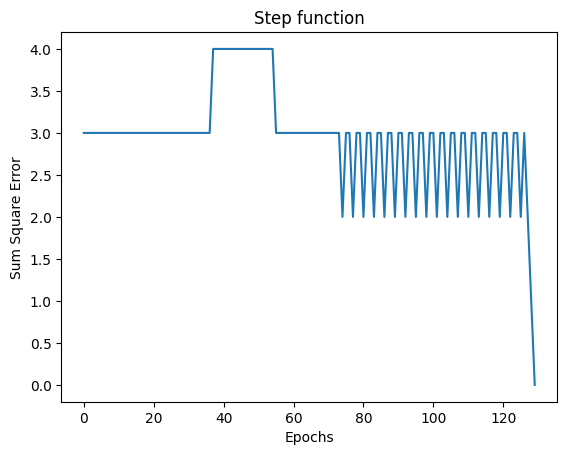

129

In [ ]:
# A2
import matplotlib.pyplot as plt
import numpy as np

# Initial weights for the perceptron
w0 = 10
w1 = 0.2
w2 = -0.75

# Weights array
w = np.array([w0, w1, w2])

# Training parameters
epochs = 1000
α = 0.05  # learning_rate
ɜ = 0.002  # convergence_rate

# Input data
X = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

# Target output
y = np.array([0, 0, 0, 1])

# Function to train the perceptron with a given activation function
def train_perceptron(X, y, weights, epochs, α , ɜ, activation_fn, type, graphs=True):
  errors = []

  # Iterate through epochs
  for epoch in range(epochs):
      total_error = 0
      current_epoch = epoch

      # Iterate through each training example
      for i in range(len(y)):
          # Calculate weighted sum
          weighted_sum = summation_unit(X[i], weights)
          # Apply activation function to get prediction
          prediction = activation_fn(weighted_sum)

          # Calculate error
          error = y[i] - prediction
          # Update total error
          total_error += error ** 2

          # Update weights
          weights += α * error * X[i]

      # Append total error to errors list
      errors.append(total_error)

      # Check for convergence
      if total_error <= ɜ:
          print(f"Convergence reached after {epoch+1} epochs.")
          break

  # Plot the error graph if graphs is set to True
  if graphs:
    plt.plot(errors)
    plt.title(f"{type} function")
    plt.xlabel("Epochs")
    plt.ylabel("Sum Square Error")
    plt.show()

  # Return the epoch at which training ended
  return current_epoch

# Train the perceptron using the step function
train_perceptron(X, y, w, epochs, α , ɜ, step_fn, "Step")

Convergence reached after 130 epochs.


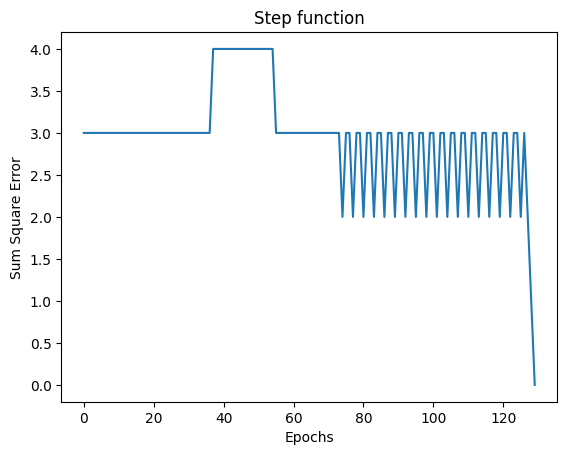

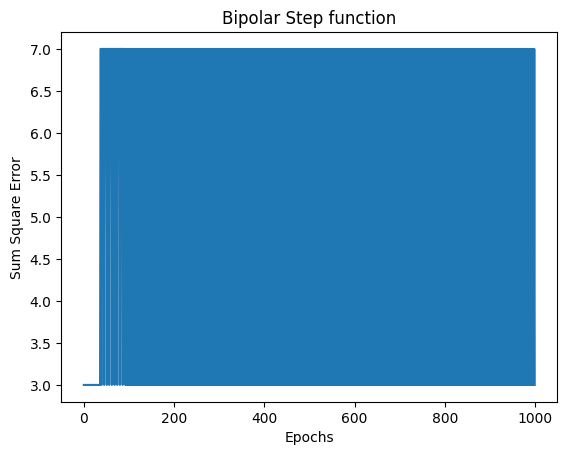

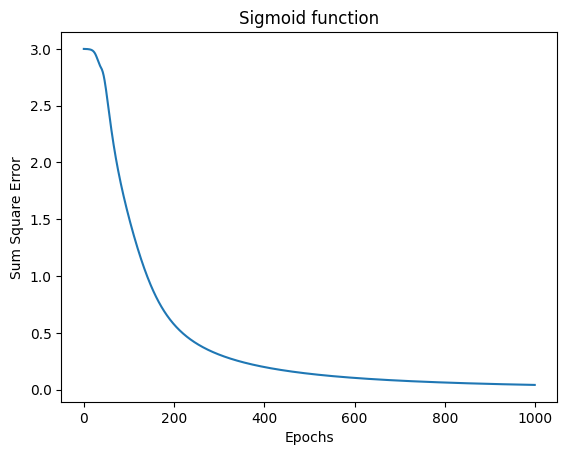

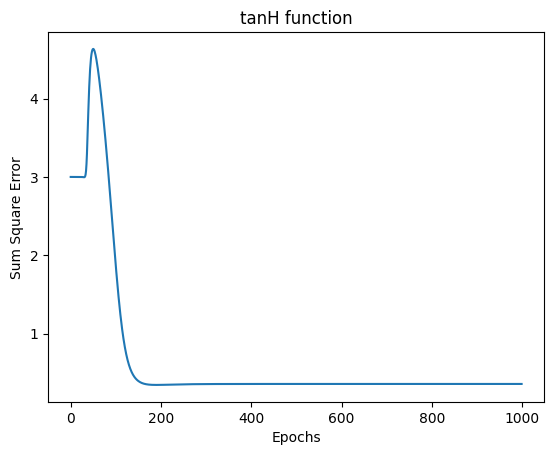

Convergence reached after 390 epochs.


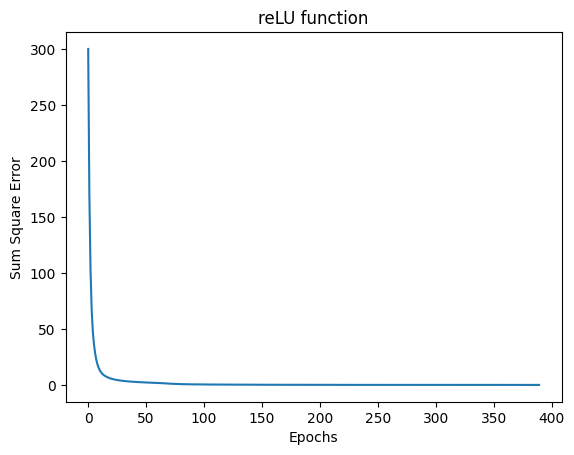

Convergence reached after 433 epochs.


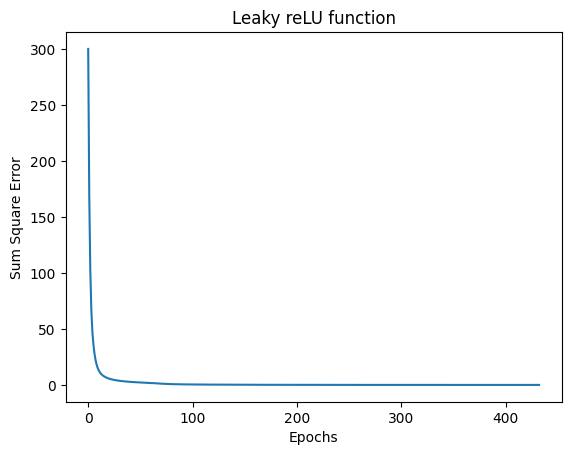

In [ ]:
# A3

# Define a list of activation functions and their corresponding names
activation_fns = [("Step", step_fn), ("Bipolar Step", bipolar_step_fn), ("Sigmoid", sigmoid_fn), ("tanH", tanh_fn), ("reLU", relu_fn), ("Leaky reLU", leaky_relu_fn)]

# Initialize weights with the initial values
initial_weights = np.array([w0, w1, w2])

# Iterate through each activation function
for activation_fn in activation_fns:
    # Copy the initial weights to avoid modifying the original values
    w = np.copy(initial_weights)
    # Train the perceptron using the current activation function
    train_perceptron(X, y, w, epochs, α , ɜ, activation_fn[1], activation_fn[0])

Convergence reached after 68 epochs.
Convergence reached after 37 epochs.
Convergence reached after 23 epochs.
Convergence reached after 23 epochs.
Convergence reached after 19 epochs.
Convergence reached after 19 epochs.
Convergence reached after 15 epochs.
Convergence reached after 14 epochs.
Convergence reached after 13 epochs.
Convergence reached after 12 epochs.


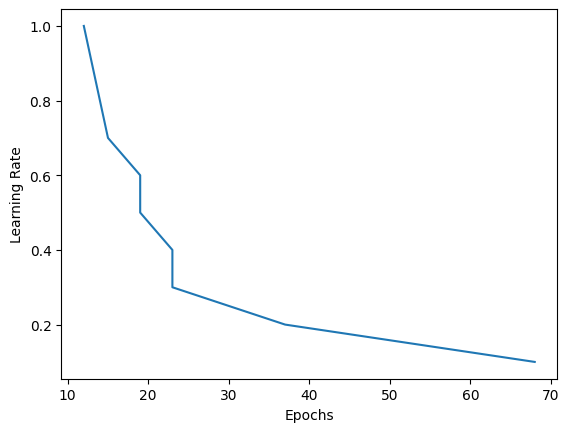

In [ ]:
# A4

# Define a list of learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize an empty list to store the number of epochs for each learning rate
epoch_list = []

# Iterate through each learning rate
for α in learning_rates:
  # Copy the initial weights to avoid modifying the original values
  w = np.copy(initial_weights)
  # Train the perceptron using the current learning rate and record the number of epochs
  epoch_list.append(train_perceptron(X, y, w, epochs, α , ɜ, step_fn, "Step", False) + 1)

# Plot the number of epochs against the corresponding learning rates
plt.plot(epoch_list, learning_rates)
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.show()

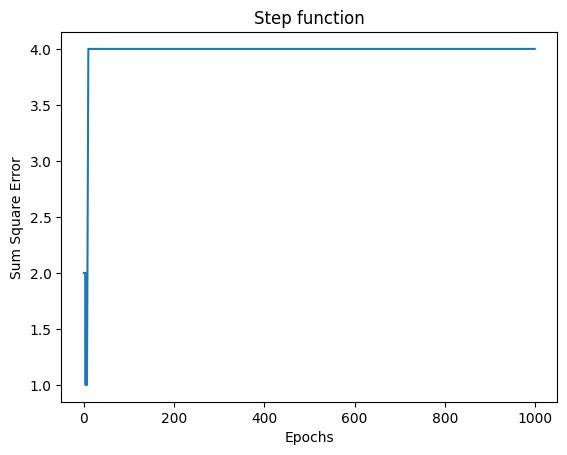

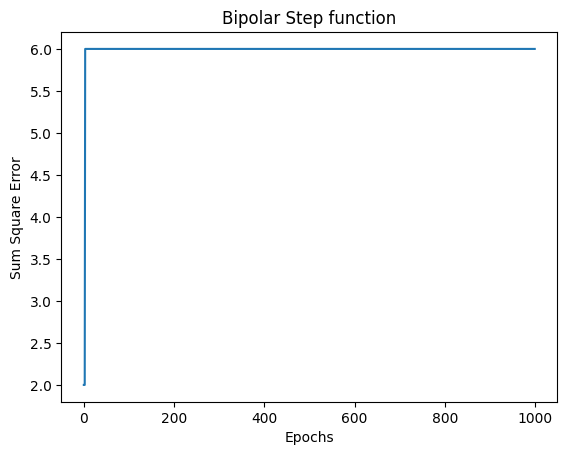

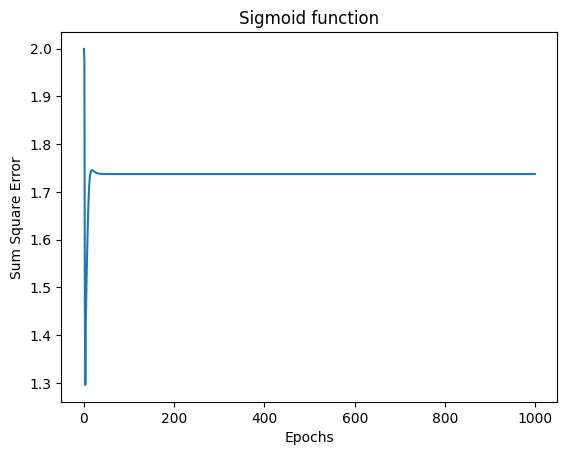

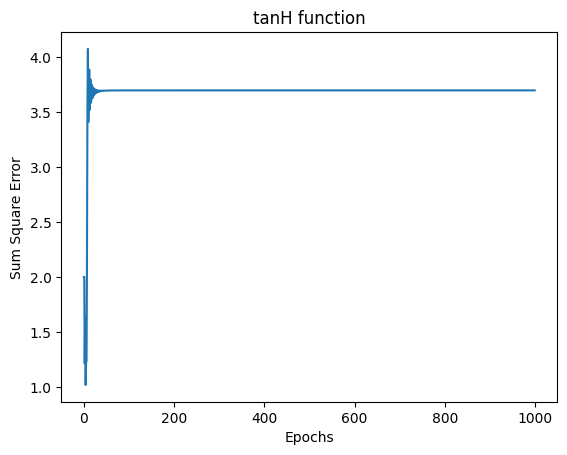

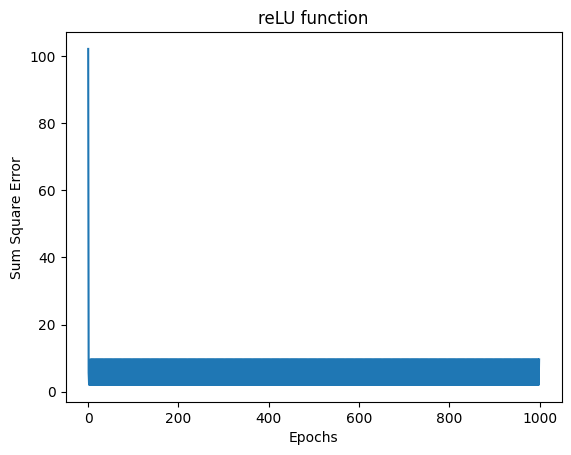

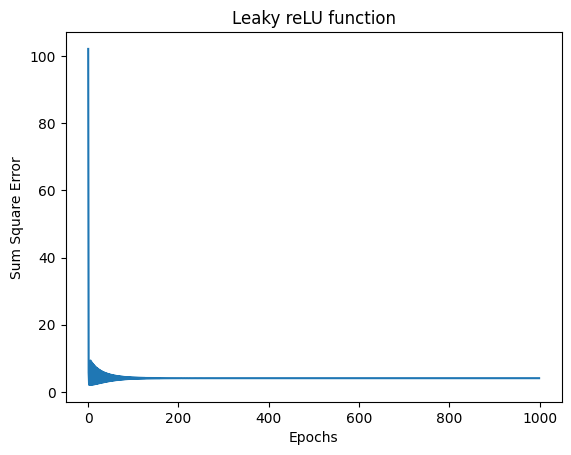

In [ ]:
# A5

# Define the input data for the XOR problem
X_XOR = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

# Define the corresponding target outputs for the XOR problem
y_XOR = np.array([0, 1, 1, 0])

# Iterate through each activation function
for activation_fn in activation_fns:
    # Copy the initial weights to avoid modifying the original values
    w = np.copy(initial_weights)
    # Train the perceptron using the current activation function on the XOR dataset
    train_perceptron(X_XOR, y_XOR, w, epochs, α , ɜ, activation_fn[1], activation_fn[0])

In [ ]:
# A6
import pandas as pd

# Download the Excel file
!wget https://tmpfiles.org/dl/12397578/a6.xlsx

# Read the Excel file into a pandas DataFrame
df = pd.read_excel("./a6.xlsx")

# Display the DataFrame
display(df)

--2024-09-08 18:33:01--  https://tmpfiles.org/dl/12397578/a6.xlsx
Resolving tmpfiles.org (tmpfiles.org)... 172.67.195.247, 104.21.21.16, 2606:4700:3036::ac43:c3f7, ...
Connecting to tmpfiles.org (tmpfiles.org)|172.67.195.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8902 (8.7K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘a6.xlsx’

a6.xlsx             100%[===================>]   8.69K  --.-KB/s    in 0s      

2024-09-08 18:33:02 (82.6 MB/s) - ‘a6.xlsx’ saved [8902/8902]



,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),High Value Tx?
0,C_1,20,6,2,386,Yes
1,C 2,16,3,6,289,Yes
2,C_3,27,6,2,393,Yes
3,C 4,19,1,22,110,No
4,C_5,24,4,22,280,Yes
5,C 6,22,1,5,167,No
6,C_7,15,4,2,271,Yes
7,C 8,18,4,2,274,Yes
8,C_9,21,1,4,148,No
9,C_10,16,2,4,198,No


<ipython-input-3-3e08f8d4442a>:15: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-x)))


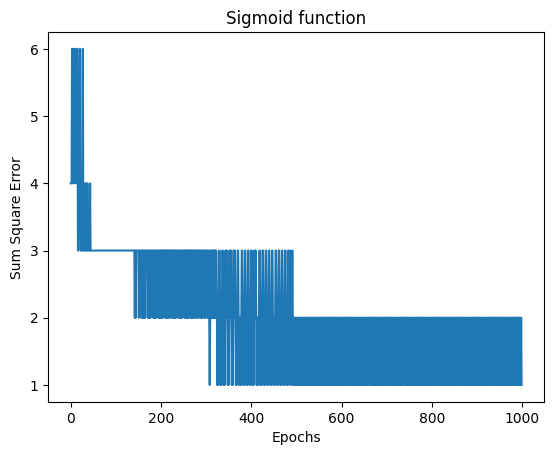

999

In [ ]:
import numpy as np

# Map the 'High Value Tx?' column to numerical values (1 for Yes, 0 for No)
Tx_y = df['High Value Tx?'].map({
    "Yes": 1,
    "No": 0
})

# Add a bias column with value 1 for each row
df["bias"] = [1] * len(df.index)

# Select the relevant features for the perceptron training
Tx_X = df.loc[:, ["bias", "Candies (#)", "Mangoes (Kg)", "Milk Packets (#)", "Payment (Rs)"]].to_numpy()

# Initialize the weights randomly
Tx_w = np.random.randn(Tx_X.shape[1])

# Train the perceptron using the sigmoid activation function
train_perceptron(Tx_X, Tx_y, Tx_w, epochs, α , ɜ, sigmoid_fn, "Sigmoid")

In [ ]:
# A7
import numpy as np

# Calculate the pseudo-inverse of the input matrix
pseudo_inv = np.linalg.pinv(Tx_X)

# Calculate the weights using the pseudo-inverse method
Tx_w_1 = np.dot(pseudo_inv, Tx_y)

# Print the calculated weights
print("Pseudo Inverse Weights:", Tx_w_1)
print("Actual Weights", Tx_w_1)

Pseudo Inverse Weights: [-0.11554997 -0.03680264  0.05735864  0.01735576  0.00452094]
Actual Weights [-0.11554997 -0.03680264  0.05735864  0.01735576  0.00452094]


Final Weights: [array([[-0.01434749,  0.00819583],
       [-0.00649269, -0.00549981]]), array([[ 0.35576301, -0.00239973],
       [ 0.27483593, -0.00641041]])]
Final Biases: [array([-0.00077559, -0.00302639]), array([0.68555274, 0.00439731])]


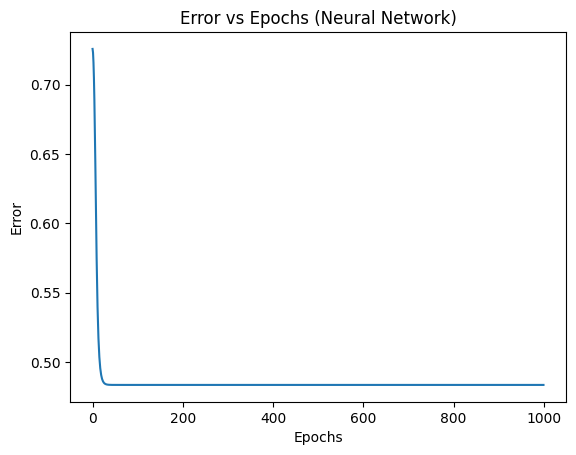

In [ ]:
# A8

import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid activation function
def sigmoid(x, derivative=False):
    # Calculate derivative if requested
    if derivative:
        return x * (1 - x)
    # Otherwise, return the sigmoid value
    return 1 / (1 + np.exp(-x))

# Initialize network weights and biases
def initialize_network(layers, outputs):
    # Initialize weights with random values between -0.05 and 0.05
    weights = [np.random.rand(layers[i], layers[i + 1]) * 0.1 - 0.05 for i in range(len(layers) - 1)]
    # Initialize weights for the output layer
    weights.append(np.random.rand(layers[-1], outputs) * 0.1 - 0.05)

    # Initialize biases with random values between -0.05 and 0.05
    biases = [np.random.rand(layers[i + 1]) * 0.1 - 0.05 for i in range(len(layers) - 1)]
    # Initialize biases for the output layer
    biases.append(np.random.rand(outputs) * 0.1 - 0.05)

    # Return the initialized weights and biases
    return weights, biases

# Feedforward propagation through the network
def feedforward(x, weights, biases, activation_function):
    # Initialize lists to store activations and z values
    activations = [x]
    z_values = []

    # Set the initial activation to the input
    a = x
    # Iterate through each layer
    for i in range(len(weights)):
      # Get the weights and biases for the current layer
      w = weights[i]
      b = biases[i]
      # Calculate the weighted sum of inputs plus bias
      z = np.dot(a, w) + b
      # Store the z value
      z_values.append(z)
      # Apply the activation function to get the activation
      a = activation_function(z)
      # Store the activation
      activations.append(a)

    # Return the activations and z values
    return activations, z_values

# Calculate the cost (mean squared error)
def cost(predicted, actual):
    # Calculate the mean squared error between predicted and actual values
    return np.mean((predicted - actual) ** 2)

# Calculate the derivative of the cost function
def cost_derivative(predicted, actual):
    # Return the derivative of the mean squared error
    return 2 * (predicted - actual)

# Backpropagation algorithm to calculate gradients
def backpropagation(x, y, weights, biases, activation_function):
    # Perform feedforward to get activations and z values
    activations, z_values = feedforward(x, weights, biases, activation_function)

    # Initialize gradients for weights and biases
    gradients_w = [np.zeros_like(w) for w in weights]
    gradients_b = [np.zeros_like(b) for b in biases]

    # Calculate delta for the output layer
    delta = cost_derivative(activations[-1], y) * activation_function(z_values[-1], derivative=True)
    # Calculate gradients for the output layer weights and biases
    gradients_w[-1] = np.outer(activations[-2], delta)
    gradients_b[-1] = delta

    # Backpropagate through hidden layers
    for l in range(2, len(weights) + 1):
        z = z_values[-l]
        # Calculate delta for the current layer
        delta = np.dot(delta, weights[-l + 1].T) * activation_function(z, derivative=True)
        # Calculate gradients for the current layer weights and biases
        gradients_w[-l] = np.outer(activations[-l - 1], delta)
        gradients_b[-l] = delta

    # Return the gradients for weights and biases
    return gradients_w, gradients_b

# Update network parameters using gradients and learning rate
def update_parameters(weights, biases, gradients_w, gradients_b, learning_rate):
    # Update weights and biases for each layer
    for i in range(len(weights)):
        weights[i] -= learning_rate * gradients_w[i]
        biases[i] -= learning_rate * gradients_b[i]

# Train the neural network for one epoch
def train(x, y, weights, biases, learning_rate, activation_function):
    # Calculate gradients using backpropagation
    gradients_w, gradients_b = backpropagation(x, y, weights, biases, activation_function)
    # Update parameters using calculated gradients
    update_parameters(weights, biases, gradients_w, gradients_b, learning_rate)
    # Return the cost for the current epoch
    return cost(feedforward(x, weights, biases, activation_function)[0][-1], y)

# Make predictions using the trained network
def predict(x, weights, biases, activation_function):
    # Perform feedforward and round the output to get the prediction
    return np.round(feedforward(x, weights, biases, activation_function)[0][-1])

# Train a multi-output perceptron with given layers, learning rate, activation function, and data
def train_multi_output_perceptron(layers, learning_rate, activation_function, df):
    # Initialize weights and biases for the network
    weights, biases = initialize_network(layers, 2)  # Assuming 2 output neurons
    # Initialize list to store errors
    errors = []

    # Get feature and target columns from the dataframe
    feature_columns = list(df.keys())[:-1]
    target_column = list(df.keys())[-1]

    # Convert target values to one-hot encoding
    targets = np.array([[1, 0] if x == 0 else [0, 1] for x in df[target_column]])

    # Iterate through epochs
    for epoch in range(1000):
        # Initialize total error for the epoch
        total_error = 0

        # Iterate through each data point
        for index in range(len(df)):
            # Get input features and target for the current data point
            x = np.array([df[col][index] for col in feature_columns])
            y = targets[index]

            # Train the network and accumulate error
            error = train(x, y, weights, biases, learning_rate, activation_function)
            total_error += error

        # Store the total error for the epoch
        errors.append(total_error)

        # Stop training if error is below threshold
        if total_error <= 0.002:
            print(f"Stopped after {epoch + 1} epochs")
            break

    # Print final weights and biases
    print(f"Final Weights: {weights}")
    print(f"Final Biases: {biases}")

    # Return the number of epochs and error history
    return epoch + 1, errors

# Example usage: Define AND gate truth table
and_gate = {
    "A": [0, 0, 1, 1],
    "B": [0, 1, 0, 1],
    "Z": [0, 0, 0, 1]
}

# Train the multi-output perceptron for the AND gate
ni, errors = train_multi_output_perceptron([2, 2], 0.1, sigmoid, and_gate)  # Adjust learning rate if needed

# Plot the training error over epochs
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs (Neural Network)")
plt.show()

Final Weights: [array([[0.01683798, 0.99134363],
       [0.0236352 , 0.99208142]]), array([[ 7.08520646e-05, -5.38955458e-01],
       [ 9.06426625e-02,  2.52439148e+00]])]
Final Biases: [array([-0.04736982,  0.00454955]), array([-0.07702859, -0.7481126 ])]


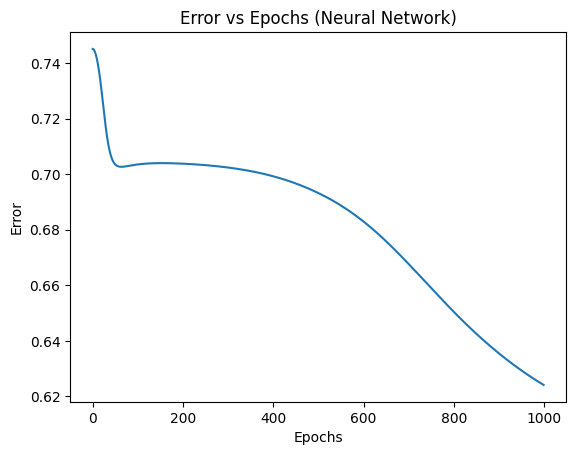

In [ ]:
# A9
# Define the XOR gate truth table
xor_gate = {
    "A": [0, 0, 1, 1],  # Input A values
    "B": [0, 1, 0, 1],  # Input B values
    "Z": [0, 1, 1, 0]  # Output Z values
}

# Train the multi-output perceptron with 2 inputs, 2 hidden neurons, learning rate 0.1, sigmoid activation function and the XOR gate data
ni, errors = train_multi_output_perceptron([2, 2], 0.1, sigmoid, xor_gate)  # Adjust learning rate if needed

# Plotting errors
plt.plot(errors)  # Plot the error values
plt.xlabel("Epochs")  # Label for the x-axis
plt.ylabel("Error")  # Label for the y-axis
plt.title("Error vs Epochs (Neural Network)")  # Title for the plot
plt.show()  # Display the plot

Final Weights: [array([[-0.04184793, -0.04035541],
       [ 0.02814516,  0.03224077]]), array([[ 0.33129531,  0.03359896],
       [ 0.34853991, -0.00173257]])]
Final Biases: [array([-0.0044685 ,  0.02397691]), array([ 0.65279404, -0.01587402])]


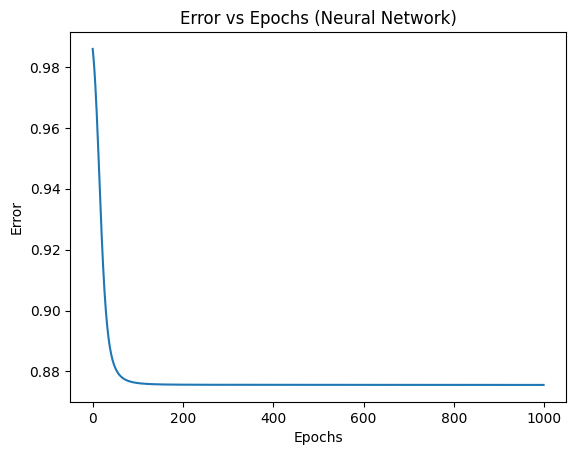

Prediction for [0, 0]: [1. 0.]


In [ ]:
# A10
import pandas as pd

# Define the number of neurons in each layer of the neural network
nn_layers = [2, 2]
# Set the learning rate for the neural network
learning_rate = 0.05
# Choose the activation function for the neural network
activation_function = sigmoid

# Create a pandas DataFrame representing the AND gate truth table
and_gate = pd.DataFrame({
    "A": [0, 0, 1, 1],
    "B": [0, 1, 0, 1],
    "Z": [0, 0, 0, 1]
})

# Train the neural network using the AND gate truth table
epochs, errors = train_multi_output_perceptron(nn_layers, learning_rate, activation_function, and_gate)

# Plot the error values over each epoch
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs (Neural Network)")
plt.show()

# Initialize the weights and biases of the neural network
weights, biases = initialize_network(nn_layers, 2)
# Predict the output of the neural network for the input [0, 0]
print("Prediction for [0, 0]:", predict(np.array([0, 0]), weights, biases, activation_function))

In [ ]:
# A11
from sklearn.neural_network import MLPClassifier

# Define the input features for the AND gate
X_AND = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

# Define the expected output for the AND gate
y_AND = [0, 0, 0, 1]

# Create an MLPClassifier with specific parameters for the AND gate
m1 = MLPClassifier(learning_rate_init=0.05, hidden_layer_sizes=(1,), max_iter=1000, activation="logistic")
# Train the classifier on the AND gate data
m1.fit(X_AND, y_AND)

print("AND Gate")
print("--------")

# Print the final weights and biases learned by the classifier
print("Final Weights:", m1.coefs_)
print("Final Biases:", m1.intercepts_)
# Print the number of epochs taken to converge
print("Epochs:", m1.n_iter_)

print("\n")
# Predict the output for each input and compare it with the actual output
for i in range(len(X_AND)):
  print(f"Predicted: {m1.predict([X_AND[i]])[0]} Actual: {y_AND[i]}")

print("\n")

# Define the input features for the XOR gate
X_XOR = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

# Define the expected output for the XOR gate
y_XOR = [0, 1, 1, 0]

# Create an MLPClassifier with specific parameters for the XOR gate
m2 = MLPClassifier(learning_rate_init=0.05, hidden_layer_sizes=(1,), max_iter=1000, activation="logistic")
# Train the classifier on the XOR gate data
m2.fit(X_XOR, y_XOR)

print("XOR Gate")
print("--------")

# Print the final weights and biases learned by the classifier
print("Final Weights:", m2.coefs_)
print("Final Biases:", m2.intercepts_)
# Print the number of epochs taken to converge
print("Epochs:", m2.n_iter_)

print("\n")
# Predict the output for each input and compare it with the actual output
for i in range(len(X_XOR)):
  print(f"Predicted: {m2.predict([X_XOR[i]])[0]} Actual: {y_XOR[i]}")

print("\n")

AND Gate
--------
Final Weights: [array([[-6.84786104],
       [-6.84310736]]), array([[-7.94250046]])]
Final Biases: [array([9.58152378]), array([3.05478072])]
Epochs: 384


Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1


XOR Gate
--------
Final Weights: [array([[7.08934445],
       [7.24093962]]), array([[5.30429826]])]
Final Biases: [array([-1.69421641]), array([-4.61804831])]
Epochs: 178


Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 1 Actual: 0




In [ ]:
# A12
!wget https://aseblr-my.sharepoint.com/:x:/g/personal/bl_en_u4cse22138_bl_students_amrita_edu/EdgpRTbM6vJLpU0yBrk10aUB2VO1s23c4tzbUWLCQu_VEA?download=1
!mv EdgpRTbM6vJLpU0yBrk10aUB2VO1s23c4tzbUWLCQu_VEA?download=1 dataset.xlsx

ds = pd.read_excel("./dataset.xlsx")

display(ds)

--2024-09-08 19:19:05--  https://aseblr-my.sharepoint.com/:x:/g/personal/bl_en_u4cse22138_bl_students_amrita_edu/EdgpRTbM6vJLpU0yBrk10aUB2VO1s23c4tzbUWLCQu_VEA?download=1
Resolving aseblr-my.sharepoint.com (aseblr-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to aseblr-my.sharepoint.com (aseblr-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/bl_en_u4cse22138_bl_students_amrita_edu/Documents/Semester%205/Machine%20Learning/Project/Dataset/custom_dataset_processed.xlsx?ga=1 [following]
--2024-09-08 19:19:06--  https://aseblr-my.sharepoint.com/personal/bl_en_u4cse22138_bl_students_amrita_edu/Documents/Semester%205/Machine%20Learning/Project/Dataset/custom_dataset_processed.xlsx?ga=1
Reusing existing connection to aseblr-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 624976 (610K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]


,text,text_length,average_word_length,unique_word_count,stop_word_count,special_character_count,keywords,sentiment,source,is_AI
0,Harsh on Les Ames to be included here. While h...,267,4.176,45,26,54,"first innings, first time, Les Ames",0,Reddit,1
1,DK Popa on there too? Tbh he&apos;s had some b...,65,3.333,14,9,15,"DK Popa, Tbh he&apos",0,Reddit,0
2,And got out for a golden duck in the first inn...,133,3.926,24,13,27,"first innings, first, test cricket",0,Reddit,0
3,Surprising how Prior was persisted by England ...,88,4.867,15,7,15,NaN,1,Reddit,0
4,Madande making Nsync proud,26,5.750,4,0,3,NaN,1,Reddit,1
...,...,...,...,...,...,...,...,...,...,...
4879,Review incoming?? On autofocus or the main cha...,51,5.125,8,3,10,NaN,0,Instagram,0
4880,The haters reigned after Thriller's unpreceden...,204,4.714,32,15,39,NaN,0,Instagram,1
4881,Ya está listo mi chocolate casero???,37,4.500,6,0,10,Ya está listo mi chocolate casero,0,Instagram,0
4882,I can’t wait! I love my Pixel ecosystem and lo...,89,4.438,15,8,18,Pixel ecosystem,1,Instagram,0


In [ ]:
# Drop rows with missing values
ds = ds.dropna()

# Print the length of the dataframe after dropping rows with missing values
print(ds.shape[0])

3415


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np

# Select relevant features from the dataset
X = ds.loc[:, ["text_length", "average_word_length", "unique_word_count", "stop_word_count",	"special_character_count"]]

# Define the target variable (is_AI)
y = ds["is_AI"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Create an MLPClassifier with specific parameters
classifier = MLPClassifier(learning_rate_init=0.05, hidden_layer_sizes=(1,), max_iter=1000, activation="logistic")

# Train the classifier on the training data
classifier.fit(X_train, y_train)
# Calculate and print the training accuracy
print(f"Train Accuracy: {classifier.score(X_train, y_train)}")
# Calculate and print the testing accuracy
print(f"Test Accuracy: {classifier.score(X_test, y_test)}")

Train Accuracy: 0.6707112970711298
Test Accuracy: 0.6653658536585366
